# Importing the required libraries and packages

In [0]:
import time

import matplotlib.pyplot as plt
import numpy as np

from keras import backend as K
from keras.models import Sequential, Model
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Conv2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout, Input
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.merge import Concatenate

from keras.datasets import cifar10

% matplotlib inline

In [0]:
np.random.seed(2017) 

# Loading the data 

In [0]:
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))
print(num_test)

170500096/170498071 [==============================] - 6s 0us/step
10000


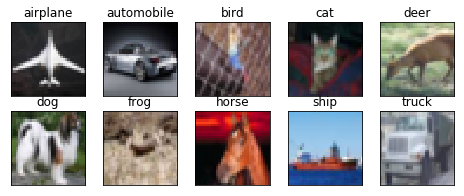

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))

for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)

plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# Model Architecture for Normal Convoluttion

Here, I've changed the model from having Dense layers to the actual Convolution layers.

In [0]:
# Define the model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3))) # 30 - 3rf
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Conv2D(64, (3, 3))) # 28 - 5rf
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Conv2D(128, (3, 3))) # 26 - 7rf
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Conv2D(32, (1, 1))) # 26 - 7rf
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(MaxPooling2D(pool_size=(2, 2))) # 13 - 8rf
model.add(Dropout(0.05))

model.add(Conv2D(64, (3, 3))) # 11 - 12rf
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Conv2D(96, (3, 3))) # 9 - 14rf
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Conv2D(128, (3, 3))) # 7 - 16rf
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Conv2D(32, (1, 1))) # 7 - 16 rf
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Activation('relu'))

model.add(Conv2D(32, (7, 7))) # 1 - 28rf
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Conv2D(10, (1, 1))) # 1 - 28rf

model.add(Flatten())
model.add(Activation('softmax'))

W0614 04:46:02.281266 139743233001344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0614 04:46:02.319756 139743233001344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0614 04:46:02.327052 139743233001344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0614 04:46:02.360836 139743233001344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0614 04:46:02.361747 1397432330

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 64)        256       
__________

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0614 04:46:06.529308 139743233001344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, shuffle=False, steps_per_epoch=390, epochs=50)`
  # Remove the CWD from sys.path while we load stuff.
W0614 04:46:06.678418 139743233001344 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<lo

Epoch 1/50
390/390 [==============================] - 26s 67ms/step - loss: 1.4510 - acc: 0.4765 - val_loss: 1.5732 - val_acc: 0.4606
Epoch 2/50
390/390 [==============================] - 21s 54ms/step - loss: 0.9806 - acc: 0.6535 - val_loss: 1.1817 - val_acc: 0.5837
Epoch 3/50
390/390 [==============================] - 21s 53ms/step - loss: 0.8014 - acc: 0.7193 - val_loss: 0.8793 - val_acc: 0.6906
Epoch 4/50
390/390 [==============================] - 21s 54ms/step - loss: 0.6961 - acc: 0.7570 - val_loss: 0.9445 - val_acc: 0.6843
Epoch 5/50
390/390 [==============================] - 21s 53ms/step - loss: 0.6283 - acc: 0.7837 - val_loss: 0.7147 - val_acc: 0.7520
Epoch 6/50
390/390 [==============================] - 21s 54ms/step - loss: 0.5715 - acc: 0.8024 - val_loss: 0.7778 - val_acc: 0.7371
Epoch 7/50
390/390 [==============================] - 21s 54ms/step - loss: 0.5181 - acc: 0.8222 - val_loss: 0.7438 - val_acc: 0.7446
Epoch 8/50
390/390 [==============================] - 21s 54ms

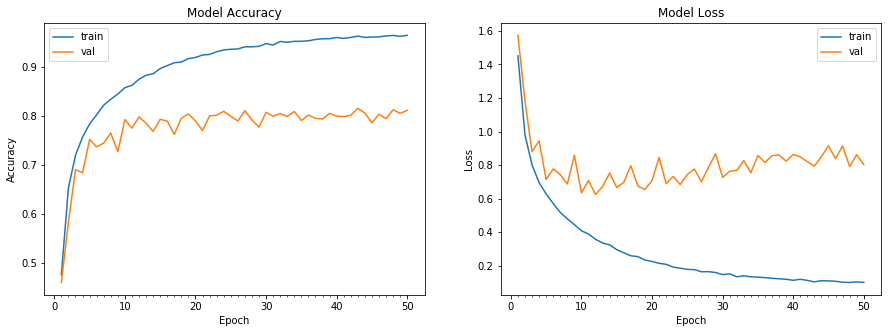

Accuracy on test data is: 81.14


In [0]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1, shuffle=False)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Model Architecture for Spatially Separable Convolutions

In [0]:
# Define the model
model = Sequential()

model.add(Conv2D(32, (3, 1), input_shape=(32, 32, 3)))
model.add(Conv2D(32, (1, 3))) # 30 - 3rf
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Conv2D(64, (3, 1))) # 28 - 5rf
model.add(Conv2D(64, (1, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Conv2D(128, (3, 1))) # 26 - 7rf
model.add(Conv2D(128, (1, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Conv2D(32, (1, 1))) # 26 - 7rf
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(MaxPooling2D(pool_size=(2, 2))) # 13 - 8rf
model.add(Dropout(0.05))

model.add(Conv2D(64, (3, 1))) # 11 - 12rf
model.add(Conv2D(64, (1, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Conv2D(96, (3, 1))) # 9 - 14rf
model.add(Conv2D(96, (1, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Conv2D(128, (3, 1))) # 7 - 16rf
model.add(Conv2D(128, (1, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Conv2D(32, (1, 1))) # 7 - 16 rf
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Activation('relu'))

model.add(Conv2D(32, (7, 1))) # 1 - 28rf
model.add(Conv2D(32, (1, 7)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Conv2D(10, (1, 1))) # 1 - 28rf

model.add(Flatten())
model.add(Activation('softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 30, 32, 32)        320       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 30, 30, 32)        3104      
_________________________________________________________________
batch_normalization_10 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_11 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 30, 64)        6208      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 64)        12352     
__________

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, shuffle=False, steps_per_epoch=390, epochs=50)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
390/390 [==============================] - 28s 71ms/step - loss: 1.5467 - acc: 0.4406 - val_loss: 1.4074 - val_acc: 0.5168
Epoch 2/50
390/390 [==============================] - 25s 64ms/step - loss: 1.0905 - acc: 0.6100 - val_loss: 1.5385 - val_acc: 0.5317
Epoch 3/50
390/390 [==============================] - 25s 63ms/step - loss: 0.9110 - acc: 0.6784 - val_loss: 1.0014 - val_acc: 0.6516
Epoch 4/50
390/390 [==============================] - 24s 63ms/step - loss: 0.8010 - acc: 0.7174 - val_loss: 0.9052 - val_acc: 0.6886
Epoch 5/50
390/390 [==============================] - 25s 63ms/step - loss: 0.7255 - acc: 0.7475 - val_loss: 0.9660 - val_acc: 0.6737
Epoch 6/50
390/390 [==============================] - 24s 62ms/step - loss: 0.6703 - acc: 0.7684 - val_loss: 1.0078 - val_acc: 0.6696
Epoch 7/50
390/390 [==============================] - 25s 63ms/step - loss: 0.6286 - acc: 0.7799 - val_loss: 0.7453 - val_acc: 0.7493
Epoch 8/50
390/390 [==============================] - 24s 63ms

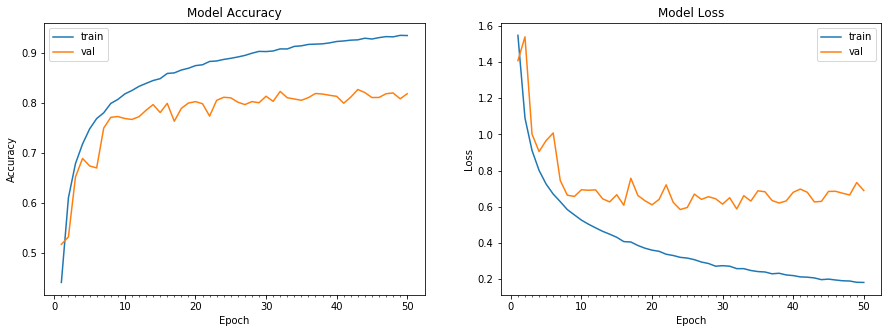

Accuracy on test data is: 81.80


In [0]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1, shuffle=False)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Model Architecture for Depthwise Separable Convolutions

In [0]:
# Define the model
model = Sequential()

model.add(SeparableConv2D(32, (3, 3), input_shape=(32, 32, 3))) # 30 - 3rf
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(SeparableConv2D(64, (3, 3))) # 28 - 5rf
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(128, (3, 3))) # 26 - 7rf
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(32, (1, 1))) # 26 - 7rf
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(MaxPooling2D(pool_size=(2, 2))) # 13 - 8rf
model.add(Dropout(0.05))

model.add(SeparableConv2D(64, (3, 3))) # 11 - 12rf
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(SeparableConv2D(96, (3, 3))) # 9 - 14rf
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(128, (3, 3))) # 7 - 16rf
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(32, (1, 1))) # 7 - 16 rf
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Activation('relu'))

model.add(SeparableConv2D(32, (7, 7))) # 1 - 28rf
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(SeparableConv2D(10, (1, 1))) # 1 - 28rf

model.add(Flatten())
model.add(Activation('softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 30, 30, 32)        155       
_________________________________________________________________
batch_normalization_19 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_21 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 28, 28, 64)        2400      
_________________________________________________________________
activation_22 (Activation)   (None, 28, 28, 64)        0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 28, 28, 64)        256       
__________

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, shuffle=False, steps_per_epoch=390, epochs=50)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
390/390 [==============================] - 33s 85ms/step - loss: 1.7413 - acc: 0.3837 - val_loss: 1.6357 - val_acc: 0.4462
Epoch 2/50
390/390 [==============================] - 30s 77ms/step - loss: 1.1669 - acc: 0.5810 - val_loss: 1.1074 - val_acc: 0.6092
Epoch 3/50
390/390 [==============================] - 30s 77ms/step - loss: 1.0162 - acc: 0.6382 - val_loss: 1.2872 - val_acc: 0.5516
Epoch 4/50
390/390 [==============================] - 30s 77ms/step - loss: 0.9281 - acc: 0.6715 - val_loss: 1.0678 - val_acc: 0.6326
Epoch 5/50
390/390 [==============================] - 30s 77ms/step - loss: 0.8578 - acc: 0.6978 - val_loss: 0.8790 - val_acc: 0.6898
Epoch 6/50
390/390 [==============================] - 30s 77ms/step - loss: 0.8060 - acc: 0.7162 - val_loss: 0.8847 - val_acc: 0.6943
Epoch 7/50
390/390 [==============================] - 30s 78ms/step - loss: 0.7684 - acc: 0.7299 - val_loss: 0.8921 - val_acc: 0.6955
Epoch 8/50
390/390 [==============================] - 30s 78ms

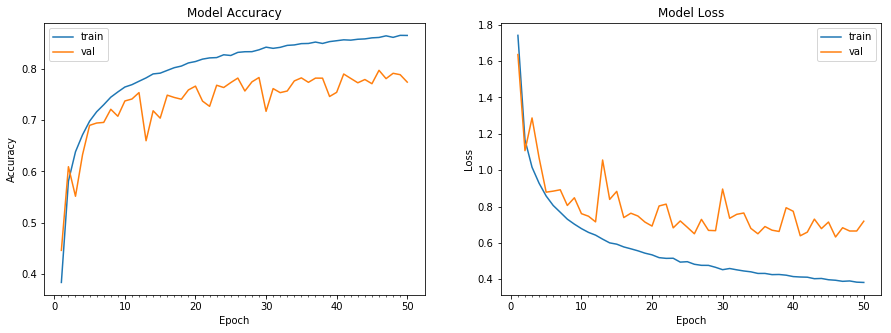

Accuracy on test data is: 77.40


In [0]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1, shuffle=False)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Model Architecture for Grouped Convolutions

In [0]:
input_data = Input(shape=(32,32,3))

layer1 = SeparableConv2D(32, (3,3), use_bias=False, padding='same')(input_data) # 3rf
layer1 = BatchNormalization()(layer1)
layer1 = Activation('relu')(layer1)

layer2 = SeparableConv2D(32, (3,3), use_bias=False, padding='same')(layer1) # 5rf
layer2 = BatchNormalization()(layer2)
layer2 = Activation('relu')(layer2)

layer3 = MaxPooling2D(pool_size=(2,2))(layer2) # 6rf 

layer4_1 = SeparableConv2D(64, (3,3), use_bias=False, padding='same')(layer3)
layer4_1 = BatchNormalization()(layer4_1)
layer4_1 = Activation('relu')(layer4_1)

layer4_2 = SeparableConv2D(64, (5,5), use_bias=False, padding='same')(layer3)
layer4_2 = BatchNormalization()(layer4_2)
layer4_2 = Activation('relu')(layer4_2)

layer5_1 = SeparableConv2D(64, (3,3), use_bias=False, padding='same')(layer4_1)
layer5_1 = BatchNormalization()(layer5_1)
layer5_1 = Activation('relu')(layer5_1)

layer5_2 = SeparableConv2D(64, (5,5), use_bias=False, padding='same')(layer4_2)
layer5_2 = BatchNormalization()(layer5_2)
layer5_2 = Activation('relu')(layer5_2)

concat_layer = Concatenate()([layer5_1, layer5_2])

layer6 = SeparableConv2D(128, (3,3), use_bias=False, padding='same')(concat_layer)
layer6 = BatchNormalization()(layer6)
layer6 = Activation('relu')(layer6)

layer7 = SeparableConv2D(128, (3,3), use_bias=False, padding='same')(layer6)
layer7 = BatchNormalization()(layer7)
layer7 = Activation('relu')(layer7)

layer8 = MaxPooling2D(pool_size=(2,2))(layer7)

layer9 = SeparableConv2D(128, (8,8), use_bias=False)(layer8)

layer10 = Conv2D(10, (1,1), use_bias=False, padding='same')(layer9)

layer11 = Flatten()(layer10)

output = Activation('softmax')(layer11)

In [0]:
model = Model(input=[input_data], output=[output])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  """Entry point for launching an IPython kernel.


In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
separable_conv2d_17 (SeparableC (None, 32, 32, 32)   123         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_34 (BatchNo (None, 32, 32, 32)   128         separable_conv2d_17[0][0]        
__________________________________________________________________________________________________
activation_37 (Activation)      (None, 32, 32, 32)   0           batch_normalization_34[0][0]     
__________________________________________________________________________________________________
separable_

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, shuffle=False, steps_per_epoch=390, epochs=50)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
390/390 [==============================] - 15s 40ms/step - loss: 1.3427 - acc: 0.5156 - val_loss: 1.1997 - val_acc: 0.5730
Epoch 2/50
390/390 [==============================] - 12s 30ms/step - loss: 0.9804 - acc: 0.6512 - val_loss: 1.0163 - val_acc: 0.6406
Epoch 3/50
390/390 [==============================] - 12s 30ms/step - loss: 0.8238 - acc: 0.7099 - val_loss: 0.8859 - val_acc: 0.6913
Epoch 4/50
390/390 [==============================] - 11s 29ms/step - loss: 0.7253 - acc: 0.7448 - val_loss: 0.9242 - val_acc: 0.6956
Epoch 5/50
390/390 [==============================] - 12s 30ms/step - loss: 0.6453 - acc: 0.7708 - val_loss: 0.8910 - val_acc: 0.7019
Epoch 6/50
390/390 [==============================] - 11s 29ms/step - loss: 0.5843 - acc: 0.7950 - val_loss: 0.7748 - val_acc: 0.7391
Epoch 7/50
390/390 [==============================] - 12s 30ms/step - loss: 0.5405 - acc: 0.8109 - val_loss: 0.7978 - val_acc: 0.7345
Epoch 8/50
390/390 [==============================] - 12s 30ms

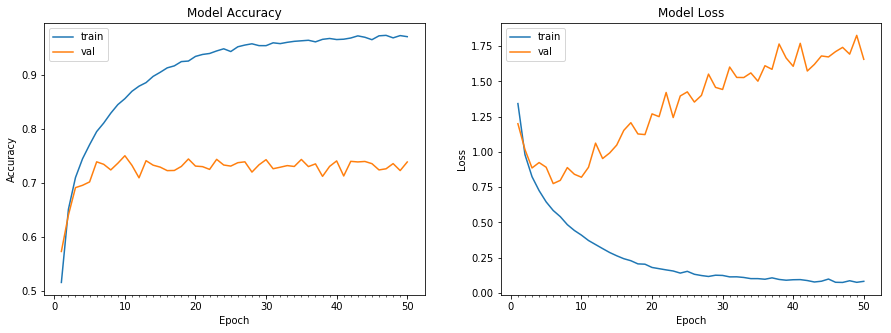

Accuracy on test data is: 73.88


In [32]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1, shuffle=False)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Model Architecture for Dilated Convolution

In [0]:
input_data = Input(shape=(32,32,3))

layer1 = SeparableConv2D(32, (3,3), use_bias=False, padding='same')(input_data) # 3rf
layer1 = BatchNormalization()(layer1)
layer1 = Activation('relu')(layer1)

layer2 = SeparableConv2D(32, (3,3), use_bias=False, padding='same')(layer1) # 5rf
layer2 = BatchNormalization()(layer2)
layer2 = Activation('relu')(layer2)

layer3 = MaxPooling2D(pool_size=(2,2))(layer2) # 6rf 

layer4_1 = SeparableConv2D(64, (3,3), use_bias=False, padding='same')(layer3)
layer4_1 = BatchNormalization()(layer4_1)
layer4_1 = Activation('relu')(layer4_1)

layer4_2 = SeparableConv2D(64, (5,5), use_bias=False, padding='same', dilation_rate=(2,2))(layer3)
layer4_2 = BatchNormalization()(layer4_2)
layer4_2 = Activation('relu')(layer4_2)

layer5_1 = SeparableConv2D(64, (3,3), use_bias=False, padding='same')(layer4_1)
layer5_1 = BatchNormalization()(layer5_1)
layer5_1 = Activation('relu')(layer5_1)

layer5_2 = SeparableConv2D(64, (5,5), use_bias=False, padding='same', dilation_rate=(2,2))(layer4_2)
layer5_2 = BatchNormalization()(layer5_2)
layer5_2 = Activation('relu')(layer5_2)

concat_layer = Concatenate()([layer5_1, layer5_2])

layer6 = SeparableConv2D(128, (3,3), use_bias=False, padding='same')(concat_layer)
layer6 = BatchNormalization()(layer6)
layer6 = Activation('relu')(layer6)

layer7 = SeparableConv2D(128, (3,3), use_bias=False, padding='same')(layer6)
layer7 = BatchNormalization()(layer7)
layer7 = Activation('relu')(layer7)

layer8 = MaxPooling2D(pool_size=(2,2))(layer7)

layer9 = SeparableConv2D(128, (8,8), use_bias=False)(layer8)

layer10 = Conv2D(10, (1,1), use_bias=False, padding='same')(layer9)

layer11 = Flatten()(layer10)

output = Activation('softmax')(layer11)

In [34]:
model = Model(input=[input_data], output=[output])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  """Entry point for launching an IPython kernel.


In [35]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
separable_conv2d_26 (SeparableC (None, 32, 32, 32)   123         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_42 (BatchNo (None, 32, 32, 32)   128         separable_conv2d_26[0][0]        
__________________________________________________________________________________________________
activation_46 (Activation)      (None, 32, 32, 32)   0           batch_normalization_42[0][0]     
__________________________________________________________________________________________________
separable_

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, shuffle=False, steps_per_epoch=390, epochs=50)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
390/390 [==============================] - 21s 53ms/step - loss: 1.3017 - acc: 0.5303 - val_loss: 1.1219 - val_acc: 0.6136
Epoch 2/50
390/390 [==============================] - 17s 43ms/step - loss: 0.9066 - acc: 0.6796 - val_loss: 1.0337 - val_acc: 0.6481
Epoch 3/50
390/390 [==============================] - 17s 42ms/step - loss: 0.7634 - acc: 0.7310 - val_loss: 0.9504 - val_acc: 0.6682
Epoch 4/50
390/390 [==============================] - 16s 42ms/step - loss: 0.6656 - acc: 0.7665 - val_loss: 0.9724 - val_acc: 0.6778
Epoch 5/50
390/390 [==============================] - 16s 42ms/step - loss: 0.6006 - acc: 0.7903 - val_loss: 0.8973 - val_acc: 0.7030
Epoch 6/50
390/390 [==============================] - 16s 42ms/step - loss: 0.5421 - acc: 0.8112 - val_loss: 0.8608 - val_acc: 0.7272
Epoch 7/50
390/390 [==============================] - 17s 42ms/step - loss: 0.4910 - acc: 0.8267 - val_loss: 0.8220 - val_acc: 0.7368
Epoch 8/50
390/390 [==============================] - 16s 42ms

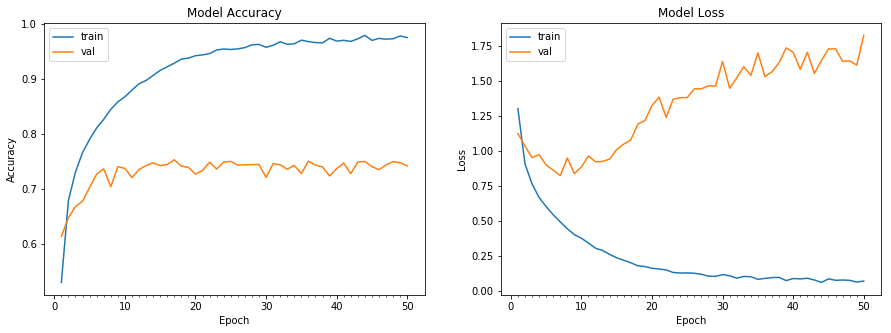

Accuracy on test data is: 74.22


In [37]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1, shuffle=False)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))